<h1>Proyecto de Covid Tweets</h1>

In [38]:
import pandas as pd #Importar libreria pandas
covidTweets = pd.read_csv("covid19_tweets.csv") #Crear un dataframe leyendo la información del archivo covid19_tweets.csv

#covidTweets.head() #-> Visualizar los primeros elementos para conocer la estructura del dataframe

#covidTweets.describe() #-> Visualizar resumen estadístico de las variables numéricas del dataframe



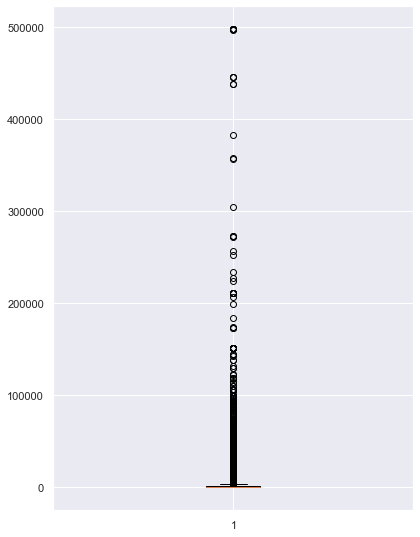

In [54]:
#Diagrama de caja y bigote de User_friends 
#En el diagrama a continuación se muestra una aglomeración en la parte inferior del mismo mientras que,
#en la parte superior se denotan que los datos están separados. Así que, nos podemos dar cuenta que son pocos los usuarios
#amigos fuera de la aglomeración mostrada.
import matplotlib.pyplot as plt
col_friends = covidTweets['user_friends']
new_data = [col_friends]
fig = plt.figure(figsize=(5,7))
ax = fig.add_axes([0,0,1,1])
box_plot = ax.boxplot(new_data)
plt.show()

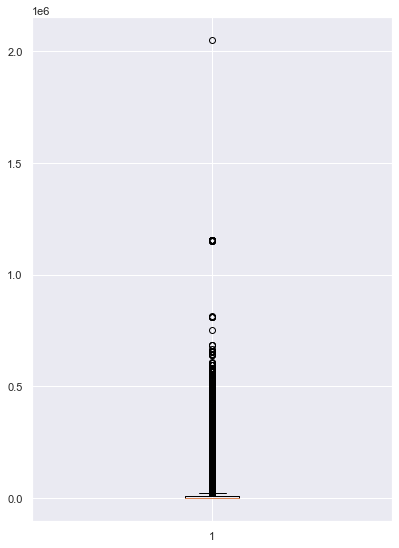

In [47]:
#Diagrama de caja y bigote de User_favourites
#En el diagrama a continuación se muestra una aglomeración en la parte inferior del mismo entre 0 - 0.7e6 mientras que,
#en la parte superior se denotan que los datos están separados. Así que, nos podemos dar cuenta que son pocos los usuarios
#con favoritos que están fuera de la aglomeración mostrada.
import matplotlib.pyplot as plt
col_favourites = covidTweets['user_favourites']
new_data = [col_favourites]
fig = plt.figure(figsize=(5,7))
ax = fig.add_axes([0,0,1,1])
box_plot = ax.boxplot(new_data)
plt.show()

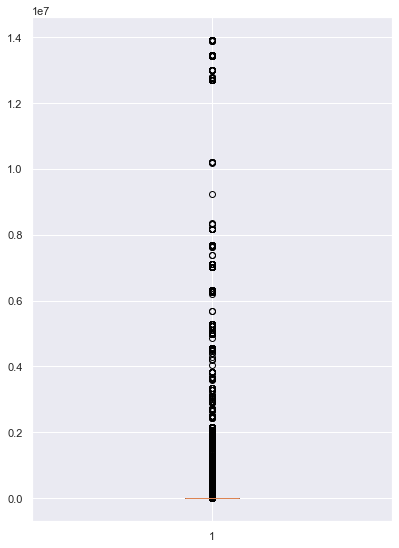

In [46]:
#Diagrama de caja y bigote de User_followers
#En el diagrama a continuación se muestra de una manera un poco más distribuida a lo largo entre 0 y 1.4e7. Por lo que, 
#podemos notar una diferencia entre los seguidores de los distintos usuarios en este archivo que leyó. También, en comparación
#con los anteriores diagramas se muestra menos distancias entre el número de seguidores de los usuarios.
import matplotlib.pyplot as plt
col_followers = covidTweets['user_followers']
new_data = [col_followers]
fig = plt.figure(figsize=(5,7))
ax = fig.add_axes([0,0,1,1])
box_plot = ax.boxplot(new_data)
plt.show()

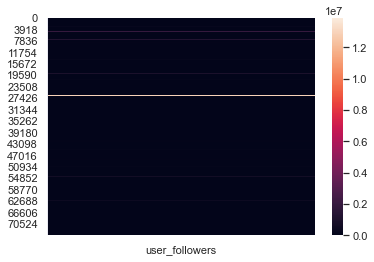

In [12]:
#Mapa de calor de user_followers
#En el diagrama a continuación se muestra un heatmap donde los colores oscuros predominan ante la única línea de un color 
#más cálido que que muestra una variación de seguidores a comparación de los demás usuarios. Estos colores oscuros ronda entre
#el 0 a 0.5e7.
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

columnas = covidTweets[['user_followers']]
ax = sns.heatmap(columnas)
plt.show()

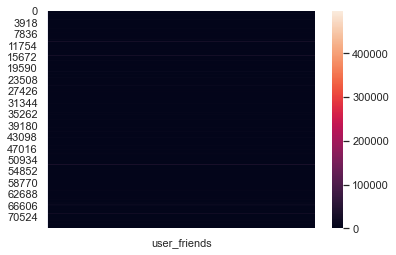

In [21]:
#Mapa de calor de user_friends
#En el diagrama a continuación se muestra un heatmap donde los colores oscuros predominan en todo el diagrama. No se puede 
#aprovechar este diagrama para un mejor análisis debido a la complejidad de la distinción de los colores. Estos colores 
#oscuros ronda entre el 100000 a 200000.
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

columnas1 = covidTweets[['user_friends']]
ax = sns.heatmap(columnas1)
plt.show()

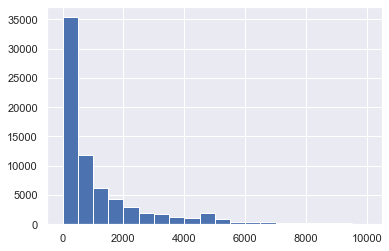

In [36]:
#Histograma de los primeros 10000 usuarios con respecto a user_friends
#En este tipo de gráfica se puede apreciar que una pequeña parte de la población de los usuarios siguen de manera recíproca a 
#las mismas cuentas que los siguen a ellos
import numpy as np
import matplotlib.pyplot as plt

plt.hist(covidTweets['user_friends'], 20, range=(0,10000))
plt.show()


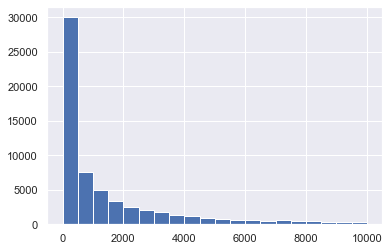

In [37]:
#Histograma de los primeros 10000 usuarios con respecto a user_followers
#En esta gráfica se puede apreciar que pocos de los usuarios tienen muchos seguidores a comparación de la demás población en 
#el archivo estudiado.
import numpy as np
import matplotlib.pyplot as plt

plt.hist(covidTweets['user_followers'], 20, range=(0,10000))
plt.show()

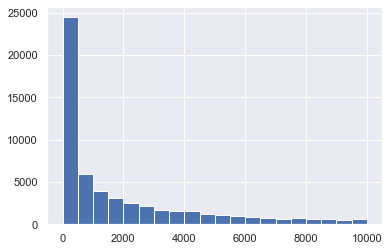

In [38]:
#Histograma de los primeros 10000 usuarios con respecto a user_favourites
#En este modelose observa que hay un exceso de favoritos en los primeros usuarios a comparación de los otros usuarios. También,
#se puede apreciar que la mayoría de la población se encuentra entre los 5000 a 0 favoritos en sus cuentas.
import numpy as np
import matplotlib.pyplot as plt

plt.hist(covidTweets['user_favourites'], 20, range=(0,10000))
plt.show()

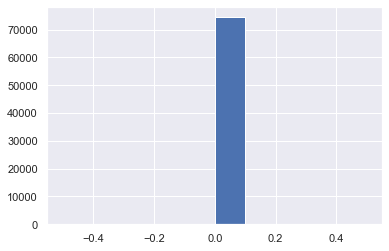

In [41]:
#Histograma de is_retweet
#En esta gráfica se denota los tweets de los usuarios si fueron retuiteados debido a que, esta variable es de tipo booleana. En
#la barra que se muestra es de False así que, todos los tweets del archivo no han sido retuiteados.
import numpy as np
import matplotlib.pyplot as plt

plt.hist(covidTweets['is_retweet'])
plt.show()

<h1> Técnica de clustering k-means </h1>


In [1]:
#Se importan los packetes para poder implementar las gráficas necesarias para esta técnica de clustering
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
 
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [2]:
# Se lee el archivo de covid19_tweets.csv donde se notan los encabezados de cada variable para tener disposición de los mismos
dataframe = pd.read_csv(r"covid19_tweets.csv")
dataframe.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


In [3]:
# Se transpuso la descripción donde user_followers, user_friends y user_favourites son variables de enteros donde se hizo la
# descripción de media, mediana, desviación estandar, entre otras variables
dataframe.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
user_followers,74436.0,105951.312913,822289.985493,0.0,166.0,960.0,5148.00,13892841.0
user_friends,74436.0,2154.721170,9365.587474,0.0,153.0,552.0,1780.25,497363.0
user_favourites,74436.0,15297.472030,46689.714291,0.0,220.0,1927.0,10148.00,2047197.0


In [4]:
# Se agruparon por medio de la variable booleana user_veried en False y True que posteriormente nos servirá como categoría
print(dataframe.groupby('user_verified').size())

user_verified
False    65082
True      9354
dtype: int64


<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


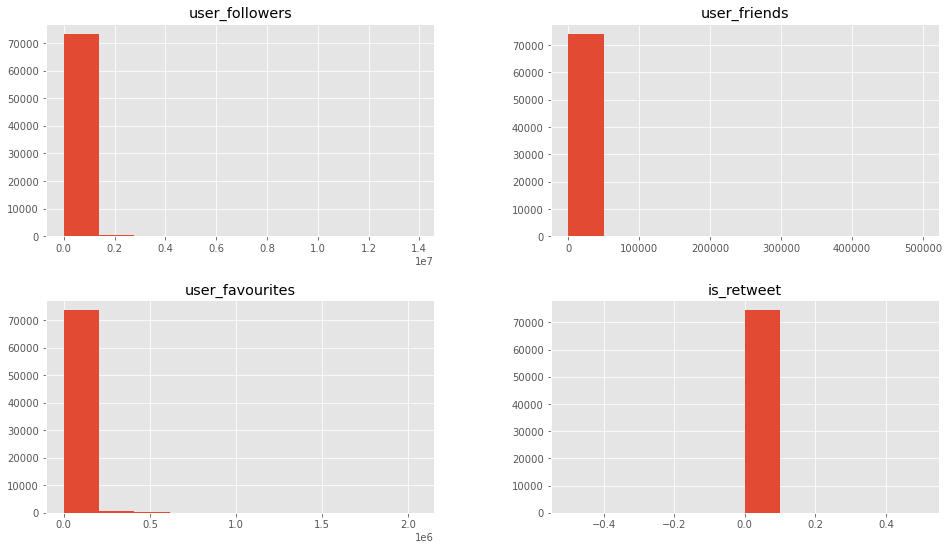

In [5]:
# Se crearon histogramas con respecto a las variables que se muestran a continuación con respecto a la categoría
# de user_verified 
dataframe.drop(['user_verified'],1).hist()
plt.show()

C:\Users\leona\Anaconda\envs\SemanaTecAnalitica\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


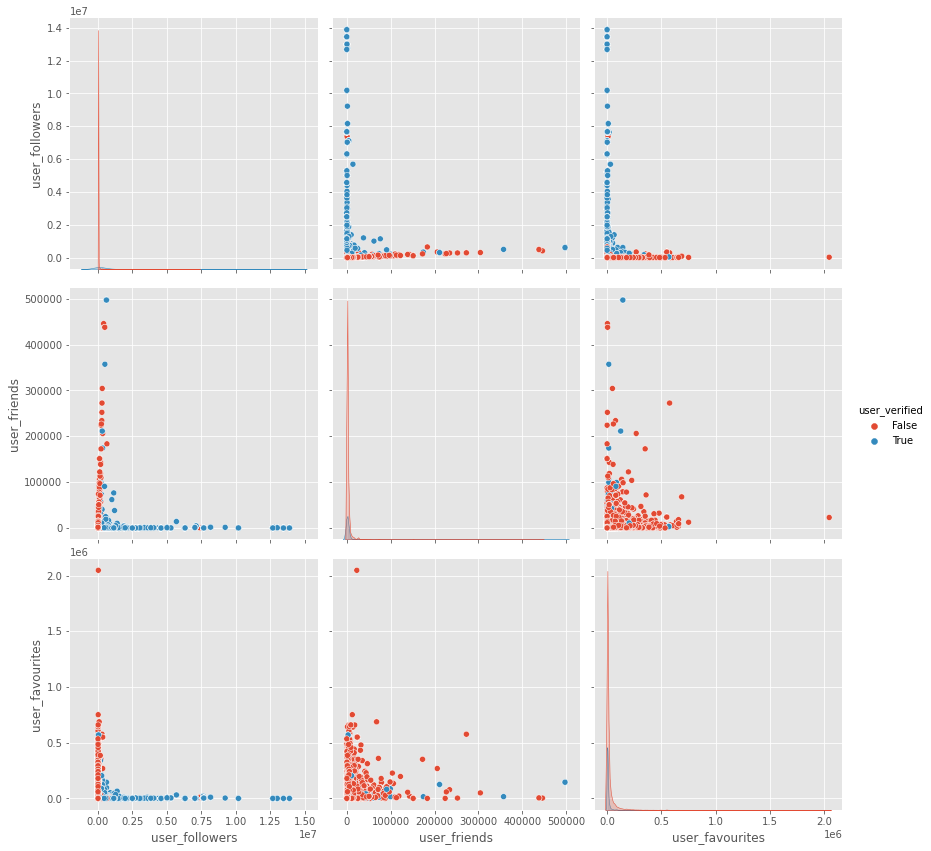

In [6]:
# En este caso seleccionamos 3 dimensiones: user_followers, user_friends y user_favourites y las cruzamos 
# para ver si nos dan alguna pista de su agrupación y la relación con sus categorías.
sb.pairplot(dataframe.dropna(), hue='user_verified',size=4,vars=["user_followers","user_friends","user_favourites"],kind='scatter')

In [7]:
#Concretamos la estructura de datos que utilizaremos para alimentar el algoritmo. 
# Como se ve, sólo cargamos las columnas user_followers, user_friends y user_favourites en nuestra variable X.
X = np.array(dataframe[["user_followers","user_friends","user_favourites"]])
y = np.array(dataframe['user_verified'])
X.shape

(74436, 3)

<ipython-input-24-180439702a09>:6: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  asignar.append(colores[row])


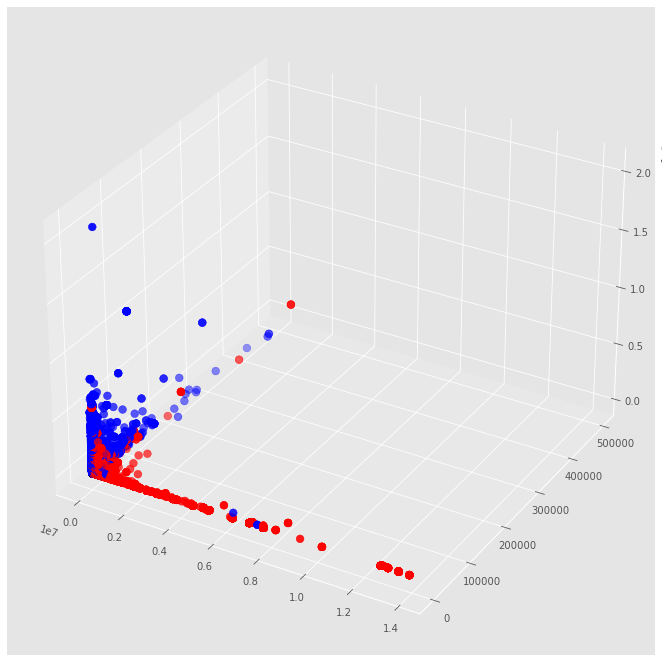

In [24]:
# A continuación veremos una gráfica en 3D con 2 colores representando las categorías de True y False por user_verified.
fig = plt.figure()
ax = Axes3D(fig)
colores=['blue','red','green']
asignar=[]
for row in y:
    asignar.append(colores[row])
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)

<h2>Obtener el valor de k</h2>

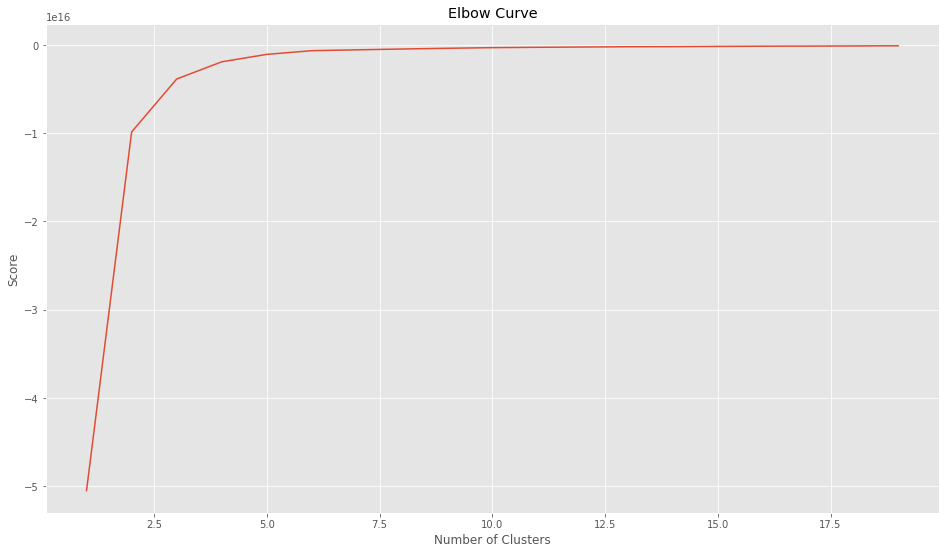

In [9]:
# Se va a hallar el valor de K haciendo una gráfica e intentando encontrar el “punto de codo” que comentábamos antes.
# Este es nuestro resultado con la gráfica que se muestra:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()
# La curva que se demuestra es relativamente continua . Consideramos a 3 como un buen número para K. 

<h3>Ejecutamos K-Means</h3>

In [11]:
# Ejecutamos el algoritmo para 3 clusters y obtenemos sus etiquetas y los centroides.
kmeans = KMeans(n_clusters=3).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[3.11669314e+04 2.17082296e+03 1.54349135e+04]
 [1.30086912e+07 2.19937888e+02 8.03913043e+01]
 [5.76923429e+06 7.11316832e+02 2.63207921e+03]]


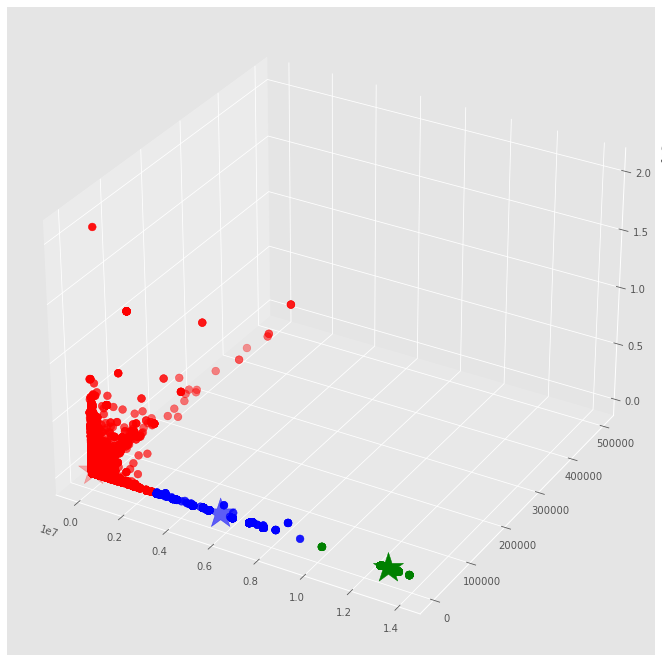

In [23]:
# Ahora lo veremos en una gráfica 3D con colores para cada grupo y veremos si se diferencian: 
# las estrellas marcan el centro de cada cluster
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['red','green','blue']
asignar=[]
for row in labels:
    asignar.append(colores[row])
 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)
# Aqui podemos ver que el Algoritmo de K-Means con K=3 ha agrupado a los 74436 usuarios de Twitter por sus datos antes 
# mencionados, teniendo en cuenta las 3 dimensiones que utilizamos. 

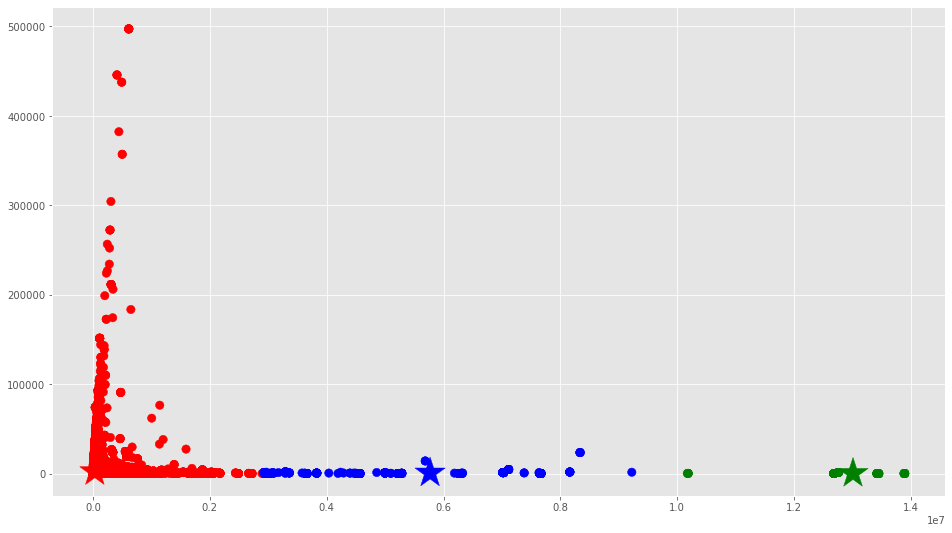

In [14]:
# Haremos 3 gráficas en 2 dimensiones con las proyecciones a partir de nuestra gráfica 3D 
# para que nos ayude a visualizar los grupos y su clasificación:
# En estas gráficas podremos ver que se encuentran bien diferenciados los grupos.
# Getting the values and plotting it
f1 = dataframe['user_followers'].values
f2 = dataframe['user_friends'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

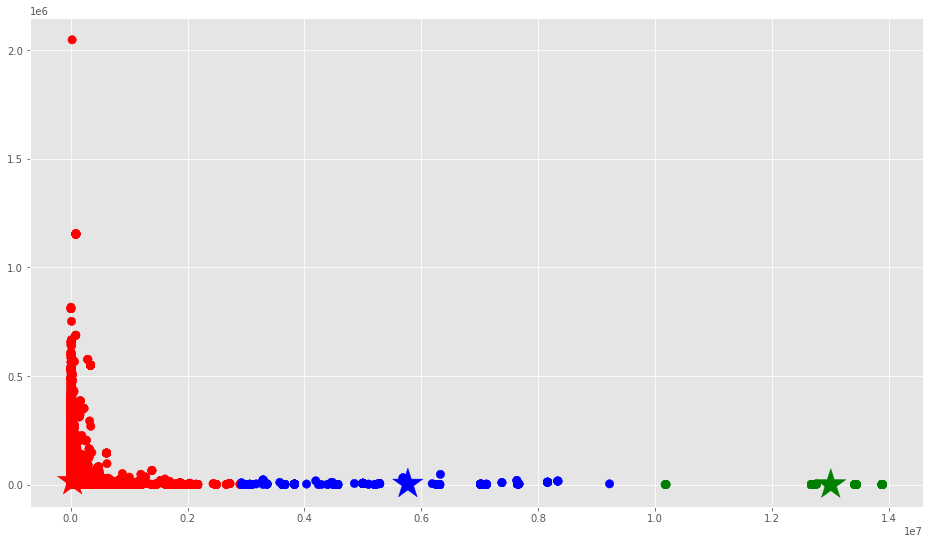

In [15]:
# Getting the values and plotting it
f1 = dataframe['user_followers'].values
f2 = dataframe['user_favourites'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

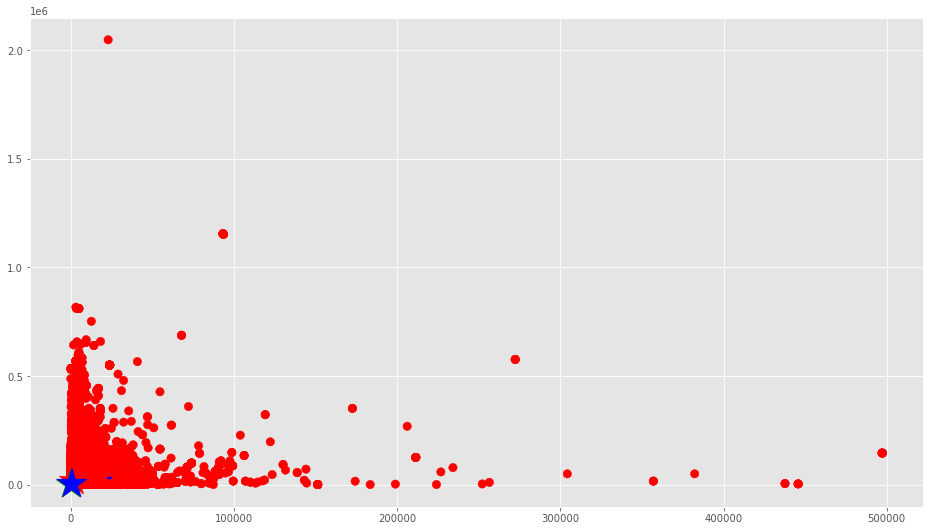

In [16]:

f1 = dataframe['user_friends'].values
f2 = dataframe['user_favourites'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 1], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

In [25]:
# Podemos ver cada uno de los clusters cuantos usuarios tiene:
copy =  pd.DataFrame()
copy['user_name']=dataframe['user_name'].values
copy['user_verified']=dataframe['user_verified'].values
copy['label'] = labels;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

,color,cantidad
0,blue,73670
1,red,161
2,green,605


In [33]:
# Y podemos ver la diversidad en rubros de cada cuenta. 
# Por ejemplo en el grupo 0, podemos ver que hay de ambos tipos de usuarios de la categoría user_verified. 
group_referrer_index = copy['label'] == 0
group_referrals = copy[group_referrer_index]
 
diversidadGrupo =  pd.DataFrame()
diversidadGrupo['user_verified']=[0,1]
diversidadGrupo['cantidad']=group_referrals.groupby('user_verified').size()
diversidadGrupo

,user_verified,cantidad
0,0,65079
1,1,8591


In [34]:
# Encontraremos los usuarios que están más cerca a los centroides de cada grupo que podríamos decir 
# que tienen las demás categorías significativas que representan a cada cluster:
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X)
closest

array([14321, 70675, 13688], dtype=int64)

In [36]:
# Podemos denotar que en los centroides se encuentran medios de comunicación y una usuaria de Twitter 
users=dataframe['user_name'].values
for row in closest:
    print(users[row])

🎗Christine Assange
The Times Of India
El Universal
